## Graphs & Charts for Memorization 

Since each the results from the memorization notebook needed to be saved to files, they are uploaded here. Once uploaded, this notebook parses the files and then calculates the summary statistics as well as graphs for the notebook. 


In [ ]:
from google.colab import files 
results = files.upload()

Saving newrun1b98000.csv to newrun1b98000.csv
Saving newrun14b98000.csv to newrun14b98000.csv
Saving newrun70m98000.csv to newrun70m98000.csv
Saving newrun160m98000.csv to newrun160m98000.csv
Saving newrun410m98000.csv to newrun410m98000.csv


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import io
import numpy as np
import pandas as pd 

model_70m = pd.read_csv('newrun70m98000.csv')
model_160m = pd.read_csv('newrun160m98000.csv')
model_410m = pd.read_csv('newrun410m98000.csv')
model_1b = pd.read_csv('newrun1b98000.csv')


In [ ]:
def get_ratios(rat, index, counts, all_scores, interval, total_bins): #ratio in which you should exceed, 
  """
  You have array all_scores: all the scores that you need to bucket into 15 buckets with range from 1 -> 15 million, with an interval of 1 million, and bucket by using index array: x 
  you need to returna list that counts the number of scores that are above a threshold "rat" for each range. 
  """
  index = np.array(index)
  all_scores = np.array(all_scores)

  memorized_counts = []
  for r in range(total_bins):
    threshold = np.logical_and(index >= interval * r, index < (r+1) * interval).astype(int)
    threshold = np.logical_and(threshold, all_scores >= rat).astype(int)
    memorized_counts.append(np.sum(threshold))
  return [a/b for a, b in zip(memorized_counts, counts)]

In [ ]:
import matplotlib.cm as cm

def plot_ratio_over_bins(df_list, ratio, total_bins, name_list):
    colors = cm.Paired(np.linspace(0, .6, len(df_list)))
    interval = 15000000 // total_bins
    
    plt.title('Fraction of Training Data K-32 Memorized')
    plt.xlabel('Index of Sequence (In Thousands)')
    plt.ylabel('Training Data Memorized')
    plt.ticklabel_format(style='plain', axis='x')

    for i, df in enumerate(df_list):
        index = np.array(df['index'])
        all_counts = df['perplexity'] 
        counts, _ = np.histogram(index, bins=total_bins, range=(1, 15000001))
        r = get_ratios(ratio, index, counts, all_counts, interval, total_bins)
        plt.plot(np.arange(0, 15000001, interval)[1:] / 1000, r, '-o', markersize=6, marker='o', color=colors[i], label=name_list[i])
    
    # Add legend with labels from name_list
    plt.legend()
    
    # Displaying the plot
    plt.show()


In [ ]:
df_list = [model_70m, model_160m, model_410m, model_1b]
name_list = ['70m', '160m', '410m', '1bil', '1.4bil']

<ipython-input-13-69658c9776c9>:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(np.arange(0, 15000001, interval)[1:] / 1000, r, '-o', markersize=6, marker='o', color=colors[i], label=name_list[i])


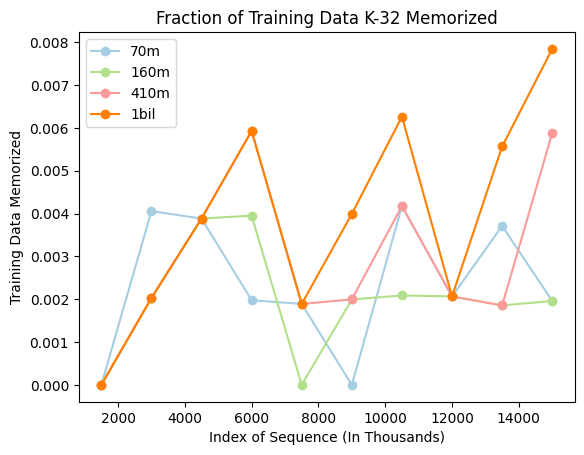

In [ ]:
plot_ratio_over_bins(df_list, 1, 10, name_list)

In [ ]:
for i, df in enumerate(df_list):
  df['size'] = name_list[i]

In [ ]:
result = pd.concat(df_list)

In [ ]:
result['size'].

array(['70m', '160m', '410m', '1bil'], dtype=object)

In [ ]:
summary = result.groupby('size')['perplexity'].agg(['mean', 'std'])

In [ ]:
print(summary)

          mean       std
size                    
160m  0.047836  0.097808
1bil  0.055641  0.114311
410m  0.052920  0.107823
70m   0.049805  0.096492
